# Classification of rice varieties with deep learning methods
##### Mayank Srivastava

- <small>[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/mayank-srivastava-6a8421105/)</small>

## Model metrics evaluation
(Note: Model Builidng and training is done seprately in **Model Building notebook.ipynb**
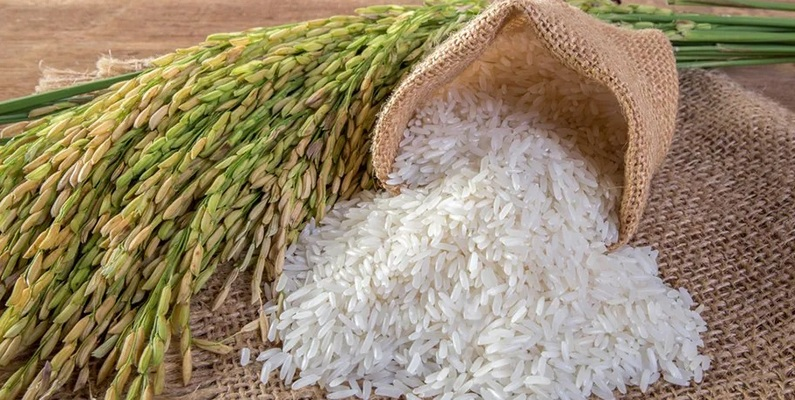

>**Importing libraries**

In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam

pd.set_option('display.max_colwidth', 150)
import cv2

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set seeds for reproducibility
import random
seed = 42
random.seed(seed)             # Sets the seed for Python's built-in random module.
np.random.seed(seed)          # Sets the seed for NumPy's random number generator.
tf.random.set_seed(seed)      # Sets the seed for TensorFlow's random operations.

In [4]:
image_width =image_height =64
batch_size =32

In [6]:
# source= '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'
source =r'E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset'

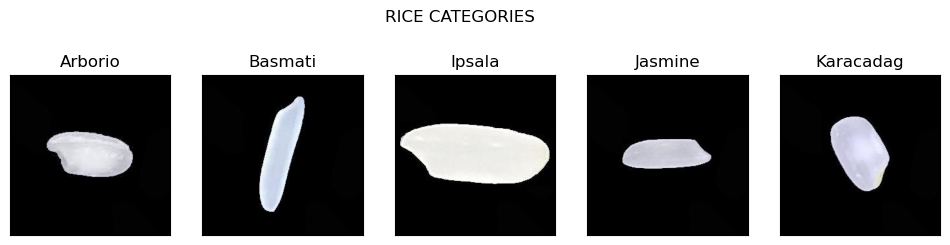

In [7]:
import os
plt.figure(figsize  = (12,3))
plt.suptitle('RICE CATEGORIES')
count =1
for i in os.listdir(source):
    if os.path.isdir(os.path.join(source,i)):
        img_path = os.path.join(source,i,os.listdir(os.path.join(source,i))[0])
        plt.subplot(1,5,count)
        plt.xticks([])
        plt.yticks([])
        plt.title(f'{i}')
        plt.imshow(img_to_array(load_img(img_path))/255)
        count+=1
plt.show()

In [8]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(source,
                                                   target_size= (image_width,image_height),
                                                    batch_size =batch_size,
                                                    class_mode ='categorical',
                                                  shuffle = True, 
                                              subset ='training')
test_generator =datagen.flow_from_directory(source, 
                                                 target_size =(image_width,image_height), 
                                                 batch_size =batch_size, 
                                                 class_mode ='categorical',
                                            shuffle = True, 
                                            subset='validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [9]:
Train =pd.DataFrame({"Path":train_generator.filepaths,"Labels":train_generator.labels})
Test =pd.DataFrame({"Path":test_generator.filepaths,"Labels":test_generator.labels})

In [10]:
Train.Labels.value_counts()

Labels
0    12000
1    12000
2    12000
3    12000
4    12000
Name: count, dtype: int64

In [11]:
Test.Labels.value_counts()

Labels
0    3000
1    3000
2    3000
3    3000
4    3000
Name: count, dtype: int64

In [12]:
Test.tail(10)

,Path,Labels
14990,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (1269).jpg,4
14991,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12690).jpg,4
14992,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12691).jpg,4
14993,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12692).jpg,4
14994,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12693).jpg,4
14995,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12694).jpg,4
14996,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12695).jpg,4
14997,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12696).jpg,4
14998,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12697).jpg,4
14999,E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset\Karacadag\Karacadag (12698).jpg,4


In [17]:
test_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [18]:
# DO NOT RUN, instead load SAVED MODEL 'model.keras'


# model = Sequential([
    
#     Conv2D(512, (3, 3), activation='relu', padding='same', input_shape=(250, 250, 3)),
#     MaxPooling2D((2, 2)),

    
#     Conv2D(256, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D((2, 2)),

    
#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D((2, 2)),

    
#     Conv2D(64, (3, 3), activation='relu', padding='same'),

    
#     Conv2D(32, (3, 3), activation='relu', padding='same'),

#     MaxPooling2D((2, 2)),  

#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(5, activation='softmax')
# ])

# model.summary()

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
#     metrics=['accuracy']
# )

In [ ]:
# DO NOT RUN, instead load SAVED MODEL 'model.keras'



# # Define ModelCheckpoint callback to save the best weights
# from tensorflow.keras.callbacks import ModelCheckpoint
# checkpoint = ModelCheckpoint('model.keras', 
#                              monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# # Train the model
# history = model.fit(
#     train_generator,
#     epochs=3,
#     validation_data=test_generator,
#     callbacks=[checkpoint],
#     shuffle = False
# )

In [ ]:
# DO NOT RUN, instead load SAVED MODEL 'model.keras'


# import matplotlib.pyplot as plt
# plt.plot(history.history['accuracy'], marker ='o' ,label ='Train_Accuracy')
# plt.plot(history.history['val_accuracy'], marker ='x',label ='Validation_Accuracy')
# plt.legend()
# plt.show()

# # Similar plot for loss
# plt.plot(history.history['loss'], marker ='o',label ='Train_loss')
# plt.plot(history.history['val_loss'],marker ='x',label ='Validation_loss')
# plt.legend()
# plt.show()

In [ ]:
# DO NOT RUN, instead load SAVED MODEL 'model.keras'



# # Load the best weights
# model.load_weights('model.keras')

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(test_generator)
# print(f'Test accuracy: {test_accuracy:.4f}')
# print(f'Test loss: {test_loss:.4f}')

# # Evaluate the model
# train_loss, train_accuracy = model.evaluate(train_generator)
# print(f'Train accuracy: {train_accuracy:.4f}')
# print(f'Train loss: {train_loss:.4f}')

## Loading the saved model

In [15]:
from keras.models import load_model
model = load_model('model.keras')

>**Making predicitons on the saved model**

In [20]:
pred =[]
for i in range(len(Test)):
    path = Test.Path[i]
    print(i)
    pred.append(np.argmax(model.predict(np.expand_dims(img_to_array(load_img(path)), axis=0) / 255.0)))
    

0
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
13
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
17
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
18
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
23
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
24

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
214
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
215
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
216
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
218
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
219
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
220
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
221
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
222
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
225
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
226
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
227
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
228
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
229
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
230
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
232
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
233
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
234
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
235
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
236
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
426
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
427
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
428
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
430
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
431
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
432
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
433
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
435
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
436
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
437
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
439
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
440
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
441
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
442
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
443
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
444
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
445
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
446
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
447
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
448
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
639
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
642
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
644
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
645
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
647
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
648
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
649
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
650
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
651
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
653
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
656
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
657
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
658
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
659
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
660
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
850
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
851
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
852
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
853
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
854
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
855
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
856
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
858
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
859
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
860
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
861
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
862
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
864
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
865
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
868
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
869
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
871
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
872
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1061
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1062
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1066
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1067
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1068
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1069
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1070
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1071
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1072
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1073
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1075
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1076
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1077
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1079
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1271
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1272
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1276
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1278
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1280
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1281
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1282
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1283
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1285
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1286
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1287
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1288
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1289
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1290
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1291
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1292
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1481
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1482
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1483
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1484
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1487
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1489
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1491
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1493
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1495
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1496
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1498
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1502
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1691
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1692
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1693
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1694
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1695
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1696
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1697
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1699
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1701
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1703
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1704
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1706
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1707
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1708
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1709
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1710
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1711
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1712
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1901
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1902
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1903
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1905
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1906
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1907
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1908
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1909
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1910
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1911
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1912
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1913
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1914
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1915
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1916
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1917
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1918
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1919
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1921
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1922
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
2111
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
2112
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
2113
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
2114
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
2115
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
2116
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
2117
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
2118
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
2119
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
2120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
2121
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
2122
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
2123
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
2124
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
2125
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
2126
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
2127
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
2128
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
2129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
2130
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
2131
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
2132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
2321
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
2322
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
2323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
2324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
2325
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
2326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
2327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
2328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
2329
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
2330
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
2331
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
2332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
2333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
2334
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
2335
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
2336
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
2337
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
2338
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
2339
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
2340
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
2341
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
2342
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
2531
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
2532
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
2533
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
2534
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
2535
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
2536
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
2537
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
2538
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
2539
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
2540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
2541
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
2542
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
2543
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
2544
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
2545
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
2546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
2547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
2548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
2549
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
2550
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
2551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
2552
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
2741
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
2742
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
2743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
2744
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
2745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
2746
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
2747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
2748
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
2749
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
2750
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
2751
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
2752
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
2753
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
2754
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
2755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
2756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
2757
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
2758
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
2759
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
2760
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
2761
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
2762
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
2951
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
2952
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
2953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
2954
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
2955
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
2956
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
2957
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
2958
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
2959
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
2960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
2961
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
2962
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
2963
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
2964
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
2965
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
2966
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
2967
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
2968
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
2969
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
2970
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
2971
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
2972
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
3161
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
3162
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
3163
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
3164
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
3165
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
3166
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
3167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
3168
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
3169
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
3170
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
3171
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
3172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
3173
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
3174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
3175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
3176
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
3177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
3178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
3179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
3180
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
3181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
3182
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
3371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
3372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
3373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
3374
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
3375
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
3376
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
3377
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
3378
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
3379
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
3380
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
3381
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
3382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
3383
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
3384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
3385
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
3386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
3387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
3388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
3389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
3390
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
3391
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
3392
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
3581
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
3582
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
3583
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
3584
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
3585
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
3586
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
3587
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
3588
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
3589
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
3590
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
3591
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
3592
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
3593
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
3594
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
3595
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
3596
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
3597
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
3598
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
3599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
3600
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
3601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
3602
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
3791
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
3792
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
3793
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
3794
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
3795
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
3796
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
3797
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
3798
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
3799
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
3800
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
3801
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
3802
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
3803
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
3804
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
3805
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
3806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
3807
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
3808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
3809
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
3810
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
3811
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
3812
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
4001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
4002
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
4003
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
4004
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
4005
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
4006
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
4007
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
4008
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
4009
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
4010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
4011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
4012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
4013
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
4014
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
4015
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
4016
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
4017
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
4018
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
4019
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
4020
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
4021
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
4022
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
4211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
4212
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
4213
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
4214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
4215
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
4216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
4217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
4218
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
4219
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
4220
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
4221
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
4222
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
4223
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
4224
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
4225
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
4226
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
4227
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
4228
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
4229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
4230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
4231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
4232
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
4421
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
4422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
4423
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
4424
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
4425
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
4426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
4427
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
4428
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
4429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
4430
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
4431
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
4432
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
4433
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
4434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
4435
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
4436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
4437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
4438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
4439
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
4440
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
4441
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
4442
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
4631
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
4632
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
4633
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
4634
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
4635
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
4636
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
4637
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
4638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
4639
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
4640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
4641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
4642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
4643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
4644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
4645
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
4646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
4647
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
4648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
4649
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
4650
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
4651
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
4652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
4841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
4842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
4843
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
4844
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
4845
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
4846
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
4847
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
4848
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
4849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
4850
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
4851
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
4852
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
4853
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
4854
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
4855
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
4856
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
4857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
4858
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
4859
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
4860
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
4861
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
4862
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
5051
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
5052
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
5053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
5054
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
5055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
5056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
5057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
5058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
5059
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
5060
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
5061
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
5062
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
5063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
5064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
5065
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
5066
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
5067
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
5068
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
5069
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
5070
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
5071
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
5072
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
5261
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
5262
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
5263
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
5264
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
5265
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
5266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
5267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
5268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
5269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
5270
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
5271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
5272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
5273
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
5274
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
5275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
5276
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
5277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
5278
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
5279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
5280
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
5281
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
5282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
5471
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
5472
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
5473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
5474
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
5475
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
5476
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
5477
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
5478
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
5479
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
5480
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
5481
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
5482
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
5483
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
5484
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
5485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
5486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
5487
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
5488
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
5489
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
5490
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
5491
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
5492
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
5681
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
5682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
5683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
5684
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
5685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
5686
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
5687
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
5688
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
5689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
5690
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
5691
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
5692
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
5693
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
5694
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
5695
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
5696
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
5697
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
5698
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
5699
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
5700
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
5701
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
5702
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
5891
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
5892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
5893
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
5894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
5895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
5896
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
5897
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
5898
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
5899
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
5900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
5901
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
5902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
5903
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
5904
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
5905
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
5906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
5907
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
5908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
5909
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
5910
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
5911
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
5912
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
6101
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
6102
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
6103
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
6104
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
6105
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
6106
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
6107
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
6108
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
6109
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
6110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
6111
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
6112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
6113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
6114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
6115
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
6116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
6117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
6118
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
6119
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
6120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
6121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
6122
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
6311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
6312
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
6313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
6314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
6315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
6316
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
6317
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
6318
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
6319
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
6320
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
6321
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
6322
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
6323
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
6324
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
6325
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
6326
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
6327
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
6328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
6329
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
6330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
6331
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
6332
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
6521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
6522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
6523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
6524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
6525
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
6526
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
6527
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
6528
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
6529
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
6530
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
6531
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
6532
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
6533
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
6534
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
6535
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
6536
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
6537
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
6538
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
6539
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
6540
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
6541
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
6542
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
6731
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
6732
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
6733
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
6734
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
6735
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
6736
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
6737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
6738
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
6739
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
6740
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
6741
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
6742
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
6743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
6744
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
6745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
6746
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
6747
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
6748
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
6749
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
6750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
6751
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
6752
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
6941
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
6942
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
6943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
6944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
6945
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
6946
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
6947
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
6948
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
6949
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
6950
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
6951
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
6952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
6953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
6954
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
6955
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
6956
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
6957
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
6958
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
6959
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
6960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
6961
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
6962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
7151
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
7152
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
7153
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
7154
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
7155
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
7156
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
7157
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
7158
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
7159
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
7160
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
7161
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
7162
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
7163
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
7164
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
7165
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
7166
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
7167
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
7168
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
7169
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
7170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
7171
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
7172
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
7361
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
7362
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
7363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
7364
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
7365
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
7366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
7367
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
7368
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
7369
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
7370
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
7371
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
7372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
7373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
7374
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
7375
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
7376
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
7377
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
7378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
7379
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
7380
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
7381
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
7382
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
7571
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
7572
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
7573
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
7574
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
7575
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
7576
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
7577
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
7578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
7579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
7580
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
7581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
7582
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
7583
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
7584
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
7585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
7586
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
7587
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
7588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
7589
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
7590
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
7591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
7592
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
7781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
7782
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
7783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
7784
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
7785
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
7786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
7787
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
7788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
7789
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
7790
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
7791
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
7792
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
7793
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
7794
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
7795
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
7796
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
7797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
7798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
7799
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
7800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
7801
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
7802
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
7991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
7992
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
7993
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
7994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
7995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
7996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
7997
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
7998
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
7999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
8000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
8001
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
8002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
8003
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
8004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
8005
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
8006
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
8007
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
8008
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step
8009
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
8010
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
8011
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
8012
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
8201
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
8202
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
8203
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
8204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
8205
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
8206
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
8207
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
8208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
8209
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
8210
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
8211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
8212
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
8213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
8214
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
8215
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
8216
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
8217
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
8218
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
8219
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
8220
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
8221
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
8222
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
8411
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
8412
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
8413
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
8414
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
8415
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
8416
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
8417
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
8418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
8419
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
8420
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
8421
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
8422
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
8423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
8424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
8425
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
8426
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
8427
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
8428
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
8429
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
8430
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
8431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
8432
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
8621
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
8622
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
8623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
8624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
8625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
8626
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
8627
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
8628
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
8629
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
8630
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
8631
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
8632
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
8633
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
8634
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
8635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
8636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
8637
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
8638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
8639
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
8640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
8641
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
8642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
8831
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
8832
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
8833
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
8834
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
8835
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
8836
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
8837
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
8838
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
8839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
8840
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
8841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
8842
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
8843
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
8844
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
8845
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
8846
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
8847
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
8848
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
8849
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
8850
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
8851
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
8852
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
9041
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
9042
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
9043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
9044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
9045
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
9046
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
9047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
9048
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
9049
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
9050
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
9051
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
9052
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
9053
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
9054
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
9055
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
9056
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
9057
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
9058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
9059
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
9060
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
9061
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
9062
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
9251
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
9252
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
9253
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
9254
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
9255
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
9256
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
9257
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
9258
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
9259
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
9260
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
9261
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
9262
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
9263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
9264
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
9265
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
9266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
9267
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
9268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
9269
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
9270
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
9271
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
9272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
9461
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
9462
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
9463
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
9464
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
9465
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
9466
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
9467
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
9468
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
9469
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
9470
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
9471
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
9472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
9473
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
9474
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
9475
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
9476
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
9477
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
9478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
9479
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
9480
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
9481
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
9482
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
9671
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
9672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
9673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
9674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
9675
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
9676
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
9677
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
9678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
9679
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
9680
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
9681
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
9682
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
9683
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
9684
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
9685
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
9686
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
9687
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
9688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
9689
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
9690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
9691
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
9692
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
9881
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
9882
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
9883
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
9884
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
9885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
9886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
9887
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
9888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
9889
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
9890
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
9891
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
9892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
9893
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
9894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
9895
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
9896
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
9897
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
9898
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
9899
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
9900
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
9901
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
9902
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
10089
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
10090
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
10091
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
10092
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
10093
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
10094
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
10095
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
10096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
10097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
10098
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
10099
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
10100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
10101
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
10102
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
10103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
10104
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
10105
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
10106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
10107
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
10108
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
10109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
10110
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
10295
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
10296
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
10297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
10298
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
10299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
10300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
10301
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
10302
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
10303
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
10304
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
10305
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
10306
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
10307
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
10308
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
10309
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
10310
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
10311
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
10312
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
10313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
10314
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
10315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
10316
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
10501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
10502
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
10503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
10504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
10505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
10506
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
10507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
10508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
10509
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
10510
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
10511
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
10512
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
10513
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
10514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
10515
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
10516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
10517
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
10518
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
10519
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
10520
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
10521
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
10522
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
10707
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
10708
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
10709
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
10710
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
10711
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
10712
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
10713
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
10714
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
10715
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
10716
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
10717
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
10718
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
10719
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
10720
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
10721
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
10722
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
10723
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
10724
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
10725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
10726
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
10727
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
10728
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
10913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
10914
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
10915
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
10916
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
10917
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
10918
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
10919
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
10920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
10921
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
10922
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
10923
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
10924
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
10925
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
10926
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
10927
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
10928
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
10929
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
10930
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
10931
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
10932
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
10933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
10934
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
11119
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
11120
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
11121
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
11122
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
11123
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
11124
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
11125
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
11126
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
11127
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
11128
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
11129
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
11130
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
11131
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
11132
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
11133
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
11134
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
11135
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
11136
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
11137
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
11138
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
11139
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
11140
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
11325
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
11326
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
11327
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
11328
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
11329
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
11330
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
11331
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
11332
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
11333
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
11334
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
11335
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
11336
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
11337
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
11338
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
11339
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
11340
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
11341
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
11342
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
11343
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
11344
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
11345
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
11346
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
11531
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
11532
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
11533
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
11534
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
11535
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
11536
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
11537
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
11538
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
11539
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
11540
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
11541
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
11542
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
11543
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
11544
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
11545
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
11546
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
11547
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
11548
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
11549
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
11550
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
11551
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
11552
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
11737
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
11738
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
11739
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
11740
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
11741
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
11742
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
11743
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
11744
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
11745
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
11746
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
11747
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
11748
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
11749
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
11750
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
11751
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
11752
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
11753
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
11754
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
11755
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
11756
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
11757
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
11758
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
11943
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
11944
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
11945
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
11946
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
11947
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
11948
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
11949
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
11950
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
11951
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
11952
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
11953
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
11954
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
11955
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
11956
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
11957
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
11958
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
11959
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
11960
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
11961
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
11962
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
11963
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
11964
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
12149
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step
12150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
12151
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
12152
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
12153
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
12154
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
12155
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
12156
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
12157
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
12158
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
12159
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
12160
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
12161
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
12162
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
12163
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
12164
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
12165
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
12166
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
12167
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
12168
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
12169
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
12170
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
12355
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
12356
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
12357
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
12358
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
12359
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
12360
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
12361
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
12362
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
12363
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
12364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
12365
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
12366
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
12367
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
12368
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
12369
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
12370
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
12371
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
12372
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
12373
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
12374
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
12375
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
12376
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
12561
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
12562
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
12563
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
12564
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
12565
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
12566
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step
12567
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
12568
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
12569
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
12570
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
12571
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
12572
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
12573
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
12574
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
12575
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
12576
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
12577
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
12578
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
12579
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
12580
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
12581
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
12582
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
12768
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
12769
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
12770
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
12771
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
12772
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
12773
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
12774
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
12775
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
12776
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
12777
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
12778
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
12779
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
12780
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
12781
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
12782
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
12783
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
12784
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
12785
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
12786
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
12787
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
12788
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
12789
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
12976
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
12977
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
12978
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
12979
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
12980
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
12981
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
12982
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
12983
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
12984
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
12985
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
12986
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
12987
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
12988
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
12989
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
12990
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
12991
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
12992
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
12993
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
12994
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
12995
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
12996
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
12997
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
13182
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
13183
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
13184
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
13185
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
13186
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
13187
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
13188
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
13189
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
13190
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
13191
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
13192
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
13193
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
13194
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
13195
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
13196
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
13197
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
13198
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
13199
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
13200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
13201
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
13202
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
13203
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
13388
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
13389
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
13390
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
13391
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
13392
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
13393
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
13394
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
13395
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
13396
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
13397
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
13398
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
13399
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
13400
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
13401
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
13402
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
13403
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
13404
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
13405
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
13406
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
13407
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
13408
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
13409
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
13594
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
13595
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
13596
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
13597
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
13598
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
13599
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
13600
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
13601
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
13602
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
13603
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
13604
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
13605
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
13606
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
13607
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
13608
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
13609
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
13610
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
13611
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
13612
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
13613
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
13614
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
13615
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
13800
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
13801
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
13802
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
13803
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step
13804
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
13805
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
13806
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
13807
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
13808
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
13809
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
13810
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
13811
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
13812
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
13813
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
13814
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
13815
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
13816
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
13817
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
13818
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
13819
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
13820
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
13821
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
14006
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
14007
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
14008
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
14009
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
14010
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
14011
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
14012
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
14013
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
14014
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
14015
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
14016
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
14017
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
14018
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
14019
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
14020
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
14021
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
14022
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
14023
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
14024
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
14025
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
14026
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
14027
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
14212
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
14213
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
14214
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
14215
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
14216
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
14217
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
14218
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
14219
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
14220
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
14221
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
14222
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
14223
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
14224
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
14225
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
14226
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
14227
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
14228
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
14229
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
14230
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
14231
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
14232
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
14233
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
14418
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
14419
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
14420
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
14421
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
14422
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
14423
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
14424
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
14425
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
14426
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
14427
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
14428
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
14429
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
14430
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
14431
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
14432
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
14433
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
14434
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
14435
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
14436
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step
14437
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
14438
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
14439
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
14624
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
14625
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
14626
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
14627
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
14628
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
14629
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
14630
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
14631
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
14632
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
14633
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
14634
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
14635
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
14636
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
14637
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
14638
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
14639
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
14640
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
14641
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
14642
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
14643
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
14644
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
14645
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
14830
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
14831
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
14832
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
14833
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
14834
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
14835
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
14836
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
14837
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
14838
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
14839
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
14840
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
14841
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
14842
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
14843
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
14844
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
14845
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
14846
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
14847
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
14848
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
14849
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
14850
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
14851
1/1 ━━━━━━

In [22]:
len(pred)

15000

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(test_generator.labels,pred)
print('accuracy_score: ', accuracy)

accuracy_score:  0.9904


In [25]:
print(classification_report(Test.Labels.values,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3000
           1       1.00      1.00      1.00      3000
           2       0.99      1.00      0.99      3000
           3       0.99      0.98      0.99      3000
           4       1.00      0.98      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [26]:
Conf_matrix =confusion_matrix(Test.Labels.values,pred)

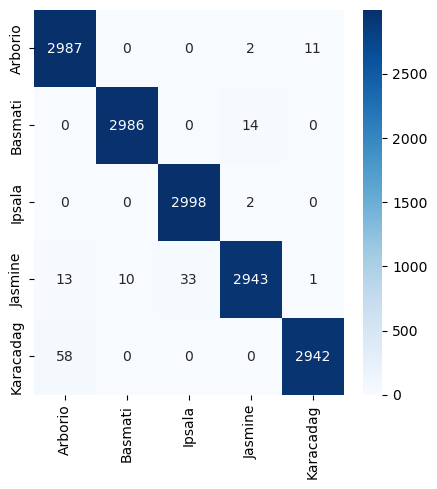

In [27]:
ticks = test_generator.class_indices.keys()
plt.figure(figsize =(5,5))
sns.heatmap(Conf_matrix, annot = True, cmap ='Blues',xticklabels=list(ticks), yticklabels =list(ticks), fmt="d")
plt.show()

**Observations:**
1. The Model with 5 nos. of conv2D and 4 nos. of MaxPooling2D layers followed by a Flatten and a FC layer of 128 neurons and then output layer.
2. Test loss and accuracy are: 0.0854, and 97.27% respectively
3. Train loss and accuracy are: 0.0755 and 97.41% respectively
4. The above results were obtained after training on 60,000 images for 3 epochs and testing on 15,000 images
5. The classification report on test data shows f1 score >0.99 for all classes.
6. Accuracy can be further improved state of art models and further fine tuning the params or increasing the epochs.

## To test the code:

```python
from keras.models import load_model
model = load_model('model.keras')


def img_paths(paths): # pass your list of image paths here
    pred =[]
    for i in range(len(paths)):
        path = paths[i]
        pred.append(np.argmax(model.predict(np.expand_dims(img_to_array(load_img(path)), axis=0) / 255.0)))
    return pred      # returns a list of predicted classes in the en-coded form of 0,1,2,3,4
```